### Diff types of GDs

## Batch GD

Batch Gradient Descent (BGD) calculates the cost and gradient using the entire dataset before updating the parameters. This ensures that each step is based on a complete and accurate estimate of the gradient, making the updates smoother and more stable.

Step-by-Step Recap
Compute the Cost Function using all training samples.
Compute the Gradient (Derivative) using the entire dataset.
Update the Parameters using the computed gradient.
Repeat Until Convergence (i.e., when the cost function stops changing significantly).
Since BGD processes the entire dataset before updating parameters, it can be slow for large datasets but provides consistent and stable updates

## Stochastic GD

Stochastic Gradient Descent (SGD) is an optimization algorithm that updates model parameters after processing each individual training example, rather than using the entire dataset like Batch Gradient Descent (BGD).

Shuffle the dataset to avoid biases in updates.
Pick one random training example 
(
𝑥
𝑖
,
𝑦
𝑖
)
(x 
i
​
 ,y 
i
​
 ).
Compute the gradient using just this single data point.
Update the parameters using the formula:
𝜃
=
𝜃
−
𝛼
⋅
∇
𝐽
(
𝜃
;
𝑥
𝑖
,
𝑦
𝑖
)
θ=θ−α⋅∇J(θ;x 
i
​
 ,y 
i
​
 )
where:
𝜃
θ = model parameters (weights)
𝛼
α = learning rate
𝐽
(
𝜃
;
𝑥
𝑖
,
𝑦
𝑖
)
J(θ;x 
i
​
 ,y 
i
​
 ) = cost function for a single example
Repeat for all examples, then reshuffle the dataset and continue iterating until convergence.

## Mini Batch GD

Similar to SGD, Instead of choosing one randomly picked training sample, you will use a batch of randomly picked training samples.

## Programming 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [80]:
df =pd.read_csv(r"Datasets\archive\large_real_estate_data.csv")
df.sample(5)

,Price,Area,Bedrooms
971,144238,3240,1
20,421879,2219,1
807,966651,2209,2
153,301664,1618,2
1,771155,2680,4


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Price     1000 non-null   int64
 1   Area      1000 non-null   int64
 2   Bedrooms  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [82]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

# Load dataset (assuming df has 'Price' colum
# Initialize MinMaxScaler
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

# Fit and transform input features (X) and target variable (y)
scaled_x = sx.fit_transform(df.drop('Price', axis='columns'))
scaled_y = sy.fit_transform(df[['Price']])  # Ensure it's a 2D array

# Now `sy` is fitted and can be used for `inverse_transform()`


In [83]:
scaled_y=sy.fit_transform(df.drop(['Area','Bedrooms'],axis='columns'))

In [93]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.001):
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features),)
    b=0
    total_samples=X.shape[0]

    cost_list = []
    epoch_list = []
    
    for i in range (epochs):
        y_predicted = np.dot(X, w) + b  # here we are taking the transpose of X to have a correct dot product

        w_grad = -(2/total_samples) * np.dot(X.T, (y_true - y_predicted))
        b_grad = -(2/total_samples) * np.sum(y_true - y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad


        cost = np.mean(np.square(y_true-y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list
        

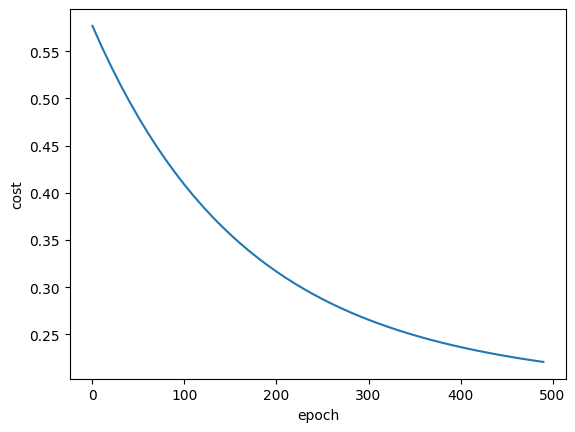

In [94]:
w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),500)

#plotting graph
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

### predict func

In [102]:
def predict(area, bedrooms, w, b):
    # Scale input features
    scaled_x = sx.transform([[area, bedrooms]])[0]  # Shape (2,)

    # Convert w to a 1D array if needed
    w = w.flatten()

    # Compute scaled price
    scaled_price = np.dot(w, scaled_x) + b  # Dot product of (2,) · (2,) → scalar

    # Convert back to original price scale
    return sy.inverse_transform([[scaled_price]])[0][0]

# Example prediction
predicted_price = predict(2680, 4, w, b)
print(predicted_price)


750706.2548109132


C:\Users\dihsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## Stochastic GD

In [103]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = np.random.randn()  # Small random initialization
    total_samples = X.shape[0]

    cost_list1 = []
    epoch_list1 = []

    for epoch in range(epochs):
        for i in range(total_samples):  # Iterate over each sample
            xi = X[i, :].reshape(1, -1)  # Extract single sample
            yi = y_true[i]  # Corresponding target
            
            y_pred = np.dot(w, xi.T) + b  # Prediction for single example
            
            # Compute gradients
            w_grad = -2 * (xi.T.dot(yi - y_pred))
            b_grad = -2 * (yi - y_pred)

            # Update weights
            w = w - learning_rate * w_grad.flatten()  # Ensure w remains 1D
            b = b - learning_rate * b_grad

        # Compute cost for monitoring
        y_preds = np.dot(X, w) + b
        cost = np.mean(np.square(y_true - y_preds))

        if epoch % 10 == 0:  # Store cost every 10 epochs
            cost_list1.append(cost)
            epoch_list1.append(epoch)

    return w, b, cost, cost_list1, epoch_list1


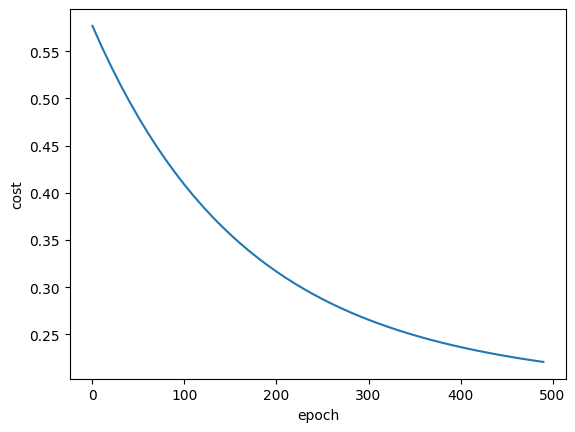

In [104]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [105]:
def predict(area, bedrooms, w, b):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    scaled_price = np.dot(w, scaled_x) + b
    return sy.inverse_transform([[scaled_price]])[0][0]

# Example prediction
predicted_price = predict(2680, 4, w, b)
print("Predicted Price:", predicted_price)

Predicted Price: 750706.2548109132


C:\Users\dihsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
